# Exploring the Titanic Data set

NB: In real applications data are way messy, I cannot tell you how overwhelming real life messy data can mess your day. Most public data sets are not as messy as we think. Found a cool memes, perhaps it will give you an idea about the reality between some kaggle data and real life application, I dont mean to scare you, it is the truth!.
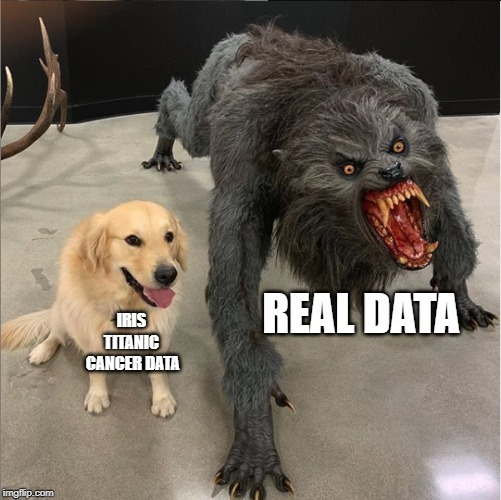
## Exploratory Data Analysis & Data Cleaning
## Why do we do Exploratory Analysis of the data
  - Better understanding of the data to identify relevant features/independent variables 
  - Make the cleaning process easier

## Common things to do during Exploratory Data Analysis (EDA)
- Check for 
   - Missing data
   - Duplicate
   - Data Consistencies
   - Data Type 
   - Correlations 
   - Distributions of features

## Why is Data Cleaning important
Remember garbage in garbage out, what ever you put in the model is what you get. 

## Common things to do during the data cleaning process
  - Standardizing
  - Encoding categorical variables
  - Anonymizing PI data

This IBM dataset is a publicly available dataset found on [Kaggle](https://www.kaggle.com/hesh97/titanicdataset-traincsv). There are 810 unique data with 10 variables. This data set is very popular on the internet with about 38,000 download. Using the information about these 1,470 employees, the goal of this data set is to a model to predict the likelihood of survival based on the following features:

- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard

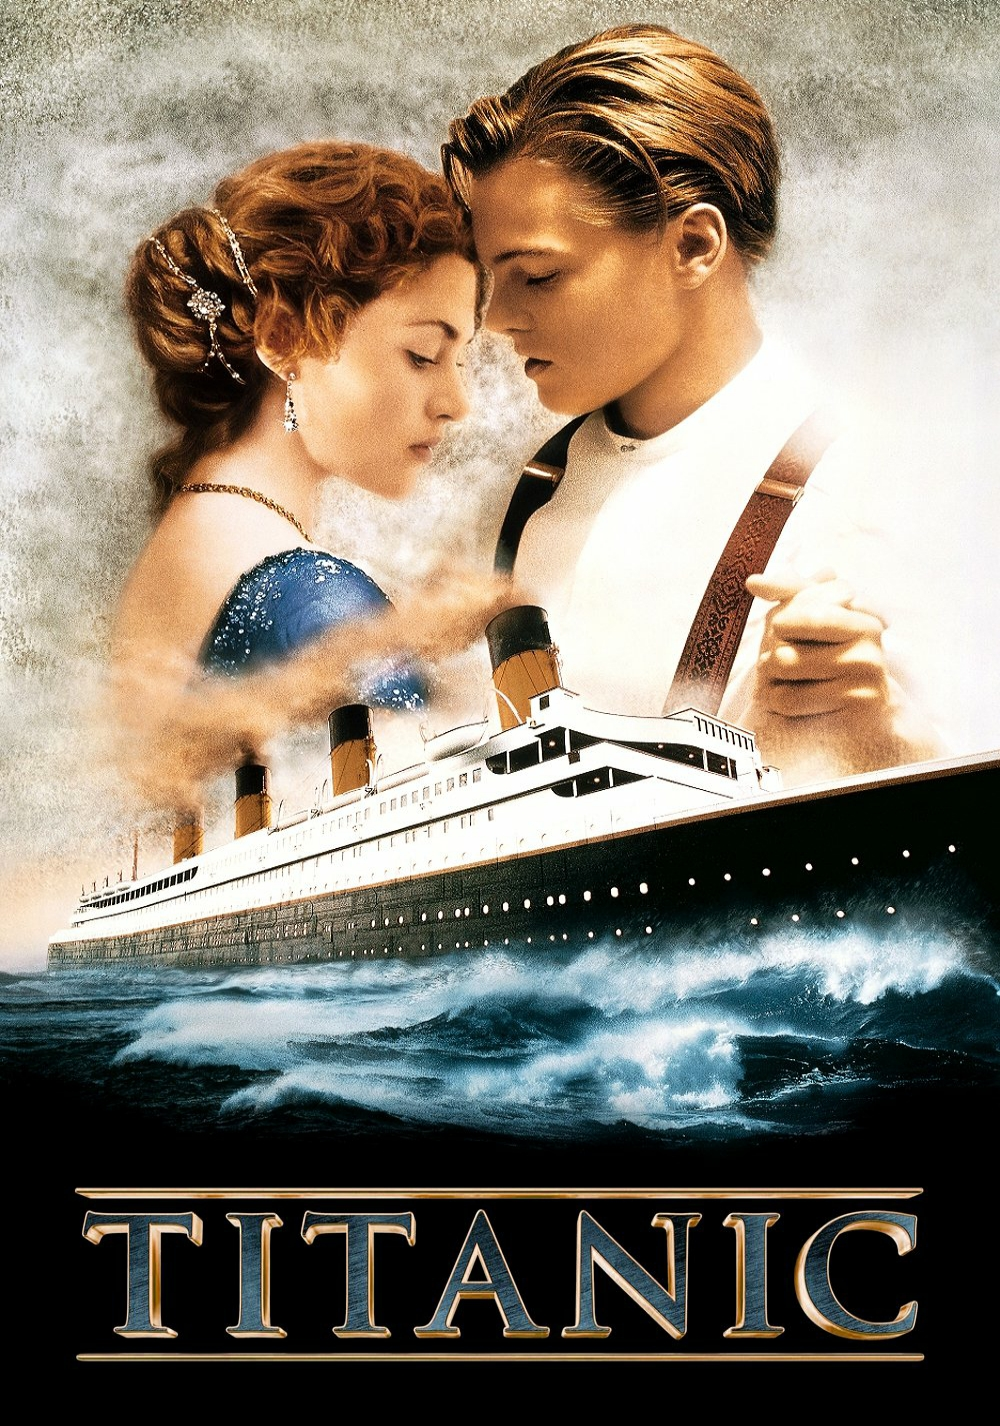

In [1]:
# importing the following packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#reading the data 
data = pd.read_csv('titanic.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 432x288 with 0 Axes>

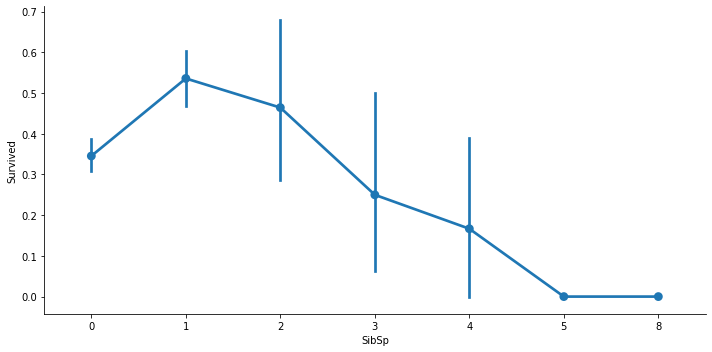

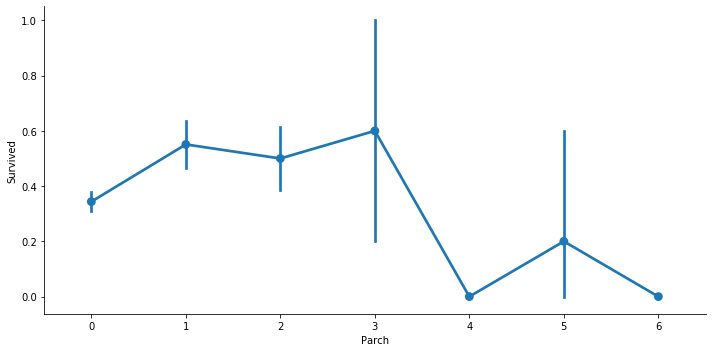

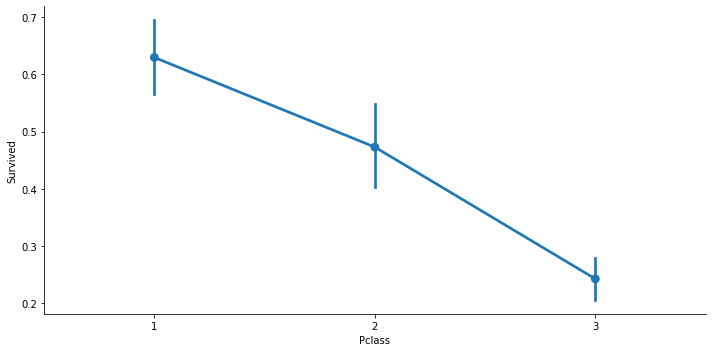

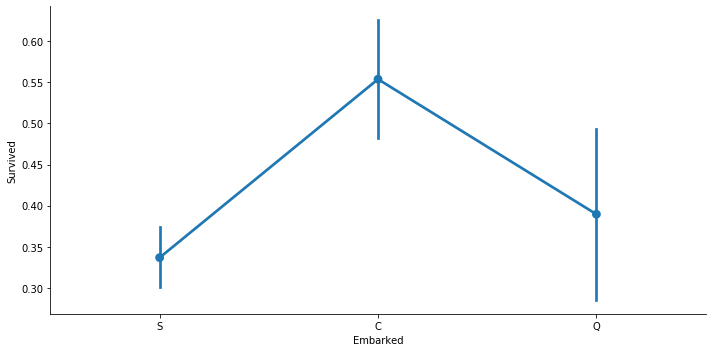

In [2]:
# Combine sibsp & parch

for i, feat in enumerate (['SibSp','Parch','Pclass','Embarked']):
        plt.figure(i)
        sns.catplot(x=feat, y='Survived',data=data,kind='point',aspect=2, )

<Figure size 432x288 with 0 Axes>

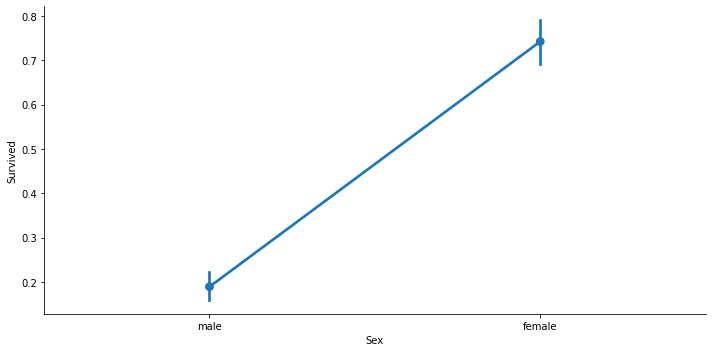

In [3]:
# viusalize other categorical variables

for i, feat in enumerate (['Sex']):
        plt.figure(i)
        sns.catplot(x=feat, y='Survived',data=data,kind='point',aspect=2, )

In [4]:
data['Family_demo'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_demo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
#Drop irrelevant features
data.drop(['SibSp','Parch','PassengerId'], axis=1, inplace=True)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_demo
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [7]:
# check for missing value
data.describe()

,Survived,Pclass,Age,Fare,Family_demo
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.904602
std,0.486592,0.836071,14.526497,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


In [8]:
#determine whether the missing values was at random or not
data.groupby(data['Age'].isnull()).mean()

,Survived,Pclass,Age,Fare,Family_demo
Age,,,,,
False,0.406162,2.236695,29.699118,34.694514,0.943978
True,0.293785,2.598870,NaN,22.158567,0.745763


In [9]:
# fill missing value with the mean
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_demo      0
dtype: int64

In [10]:
#identify features that are likely to impact survival
data.groupby('Survived').mean()

,Pclass,Age,Fare,Family_demo
Survived,,,,
0,2.531876,30.415100,22.117887,0.883424
1,1.950292,28.549778,48.395408,0.938596


In [11]:
# cabin was not missing at random, 
data.groupby(data['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [12]:
data['Cabin']= np.where(data['Cabin'].isnull(),0,1)
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_demo
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0,S,0


In [13]:
# Embarked EDA
data.groupby(data['Embarked'].isnull())['Survived'].mean()

Embarked
False    0.382452
True     1.000000
Name: Survived, dtype: float64

In [14]:
# Explore using contigent table
data.pivot_table('Survived',index='Sex', columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [15]:
# Explore using contigent table
data.pivot_table('Survived',index='Pclass', columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [16]:
#Convert categroical variables to numeric
sex_num={'male':0,'female':1}
data['Sex']=data['Sex'].map(sex_num)
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_demo
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,1,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,1,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,S,0


In [17]:
#drop PII and ticket and embark
data.drop(['Name','Ticket','Embarked'], axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Family_demo
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [18]:
# Cleaned data
data_clean =data
data_clean.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Family_demo
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


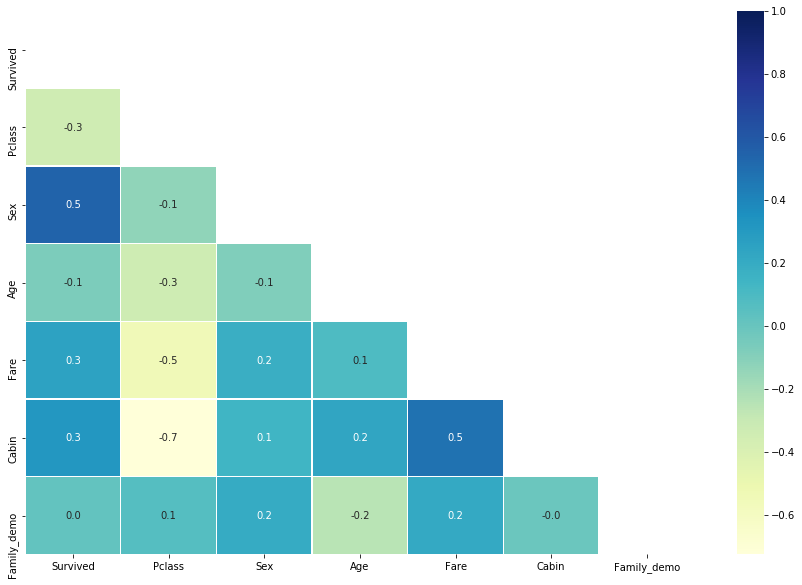

In [19]:
# Calculate correlations
corr = data_clean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=1,
            mask=mask,
             annot=True, fmt='.1f',
            linewidths=.2, cmap="YlGnBu")

In [20]:
#know more about my Label to determine imbalanced data set
data_clean['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Imbalanced is not a problem really as the ratio to not surving and surving is 0.62.

In [65]:
from sklearn.model_selection import train_test_split
features=data_clean.drop('Survived',axis =1)

# Feature Scaling
names=features.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_scale= sc.fit_transform(features)
features=pd.DataFrame(features_scale,columns=names)

labels = data_clean['Survived']
#labels=pd.DataFrame(labels,columns =['Survived'])


X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.4,random_state=54)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=54)

In [66]:
for dataset in [y_train,y_val,y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


In [67]:
# Storing these data partition 
X_train.to_csv('C:/Users/Admin/Desktop/titanic/train_features.csv', index=False)
X_val.to_csv('C:/Users/Admin/Desktop/titanic/val_features.csv', index=False)
X_test.to_csv('C:/Users/Admin/Desktop/titanic/test_features.csv', index=False)

y_train.to_csv('C:/Users/Admin/Desktop/titanic/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Admin/Desktop/titanic/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Admin/Desktop/titanic/test_labels.csv', index=False)

# Logistic Regression

In [70]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')


In [71]:
train_labels.shape

(534, 1)

In [72]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [73]:
lr=LogisticRegression()
parameters = {
    'C':[0.001,0.01,0.1,1,10,100,1000]
}

cv = GridSearchCV(lr,parameters,cv=5)
cv.fit(train_features,train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1}

0.625 (+/-0.003) for {'C': 0.001}
0.8 (+/-0.029) for {'C': 0.01}
0.813 (+/-0.063) for {'C': 0.1}
0.813 (+/-0.063) for {'C': 1}
0.809 (+/-0.059) for {'C': 10}
0.809 (+/-0.059) for {'C': 100}
0.809 (+/-0.059) for {'C': 1000}


In [ ]:
cv.best_estimator_

# Suport Vector Machine Learning : Hyperparameters

In [74]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

svm=SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,1,10]
}

svm_cv = GridSearchCV(svm,parameters,cv=5)
svm_cv.fit(train_features,train_labels.values.ravel())

print_results(svm_cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.798 (+/-0.064) for {'C': 0.1, 'kernel': 'linear'}
0.824 (+/-0.068) for {'C': 0.1, 'kernel': 'rbf'}
0.798 (+/-0.064) for {'C': 1, 'kernel': 'linear'}
0.828 (+/-0.068) for {'C': 1, 'kernel': 'rbf'}
0.798 (+/-0.064) for {'C': 10, 'kernel': 'linear'}
0.805 (+/-0.053) for {'C': 10, 'kernel': 'rbf'}


In [75]:
svm_cv.best_estimator_

SVC(C=1)

# Multilayer Perceptron is a classic feed forward artificial neural network, the core component of deep learning. In brief, this is a connected series of nodes where each node represents a function or a model

In [76]:
from sklearn.neural_network import MLPRegressor,MLPClassifier
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

mlp=MLPClassifier()
parameters = {
    'hidden_layer_sizes':[(10,),(50,),(100,)],
    'activation':['relu','tanh','logistic'],
    'learning_rate':['constant','invscaling','adaptive']
}

mlp_cv = GridSearchCV(mlp,parameters,cv=5)
mlp_cv.fit(train_features,train_labels.values.ravel())

print_results(mlp_cv)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}

0.82 (+/-0.047) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.824 (+/-0.057) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.824 (+/-0.053) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.822 (+/-0.025) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.83 (+/-0.052) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.835 (+/-0.053) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.83 (+/-0.033) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.828 (+/-0.044) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.822 (+/-0.058) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [78]:
mlp_cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(50,), learning_rate='adaptive')

# Random Forest merges a collection of independent decision trees to get a more accurate and stable prediction. It is a type of ensemble method that combines several ML models in order to decrease both the bias and variance

In [79]:
# Import Random Forest Algorithm for Classification and regression

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

rf=RandomForestClassifier()
parameters = {
    'n_estimators':[5,50,250],
    'max_depth':[2,4,8,16,32,None]
}

rf_cv = GridSearchCV(rf,parameters,cv=5)
rf_cv.fit(train_features,train_labels.values.ravel())

print_results(rf_cv)


BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.775 (+/-0.05) for {'max_depth': 2, 'n_estimators': 5}
0.801 (+/-0.027) for {'max_depth': 2, 'n_estimators': 50}
0.813 (+/-0.055) for {'max_depth': 2, 'n_estimators': 250}
0.818 (+/-0.061) for {'max_depth': 4, 'n_estimators': 5}
0.815 (+/-0.019) for {'max_depth': 4, 'n_estimators': 50}
0.826 (+/-0.062) for {'max_depth': 4, 'n_estimators': 250}
0.805 (+/-0.044) for {'max_depth': 8, 'n_estimators': 5}
0.824 (+/-0.056) for {'max_depth': 8, 'n_estimators': 50}
0.83 (+/-0.043) for {'max_depth': 8, 'n_estimators': 250}
0.798 (+/-0.019) for {'max_depth': 16, 'n_estimators': 5}
0.813 (+/-0.06) for {'max_depth': 16, 'n_estimators': 50}
0.816 (+/-0.043) for {'max_depth': 16, 'n_estimators': 250}
0.798 (+/-0.07) for {'max_depth': 32, 'n_estimators': 5}
0.809 (+/-0.076) for {'max_depth': 32, 'n_estimators': 50}
0.811 (+/-0.039) for {'max_depth': 32, 'n_estimators': 250}
0.777 (+/-0.024) for {'max_depth': None, 'n_estimators': 5}
0.807 (+/-0.055)

# Boosting is an ensemble method that aggregates a number of weak models to create one strong model. A weak model is one that is only slightly better than random guessing. Boosting effectively learns from its mistakes with each iteration. 

In [80]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

gb=GradientBoostingClassifier()
parameters = {
    'n_estimators':[5,50,250,500],
    'max_depth':[1,3,5,7,9],
    'learning_rate':[0.01,0.1,1,10,100]
}

gb_cv = GridSearchCV(gb,parameters,cv=5)
gb_cv.fit(train_features,train_labels.values.ravel())

print_results(gb_cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

0.625 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.8 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.8 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.818 (+/-0.055) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.625 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.807 (+/-0.045) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.828 (+/-0.071) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.826 (+/-0.068) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.625 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.794 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.822 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.807 (+/-0.065) for {'learning_rate

In [81]:
gb_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)

# Another Boosting method widely used - Xtreme Gradient Boosting: XGBoost

In [119]:
from xgboost import XGBClassifier,XGBRegressor
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

xg=XGBClassifier()
parameters = {
    'learning_rate':[0.3,0.6,1,10,100],
    'max_depth':[6,9,11,12,15]
}

xg_cv = GridSearchCV(xg,parameters,cv=5)
xg_cv.fit(train_features,train_labels.values.ravel())

print_results(xg_cv)

BEST PARAMS: {'learning_rate': 0.3, 'max_depth': 11}

0.794 (+/-0.094) for {'learning_rate': 0.3, 'max_depth': 6}
0.792 (+/-0.064) for {'learning_rate': 0.3, 'max_depth': 9}
0.794 (+/-0.073) for {'learning_rate': 0.3, 'max_depth': 11}
0.792 (+/-0.08) for {'learning_rate': 0.3, 'max_depth': 12}
0.792 (+/-0.072) for {'learning_rate': 0.3, 'max_depth': 15}
0.783 (+/-0.062) for {'learning_rate': 0.6, 'max_depth': 6}
0.775 (+/-0.06) for {'learning_rate': 0.6, 'max_depth': 9}
0.773 (+/-0.062) for {'learning_rate': 0.6, 'max_depth': 11}
0.783 (+/-0.091) for {'learning_rate': 0.6, 'max_depth': 12}
0.777 (+/-0.069) for {'learning_rate': 0.6, 'max_depth': 15}
0.788 (+/-0.066) for {'learning_rate': 1, 'max_depth': 6}
0.775 (+/-0.056) for {'learning_rate': 1, 'max_depth': 9}
0.783 (+/-0.047) for {'learning_rate': 1, 'max_depth': 11}
0.779 (+/-0.044) for {'learning_rate': 1, 'max_depth': 12}
0.779 (+/-0.044) for {'learning_rate': 1, 'max_depth': 15}
0.663 (+/-0.116) for {'learning_rate': 10, 'max_d

In [112]:
# saving all the models created
# logistic regression
joblib.dump(cv.best_estimator_,'LG.pkl')

# svm
joblib.dump(svm_cv.best_estimator_,'svm.pkl')

# multilayer perceptron
joblib.dump(mlp_cv.best_estimator_,'mlp.pkl')

# logistic regression
joblib.dump(rf_cv.best_estimator_,'rf.pkl')

# Gradient Boosting
joblib.dump(gb_cv.best_estimator_,'gb.pkl')

# Gradient Boosting
joblib.dump(xg_cv.best_estimator_,'xg.pkl')

['xg.pkl']

# validate the models using the validation data


In [ ]:
import os

print(os.getcwd())

In [113]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [115]:
#iterating through the models built

from sklearn.metrics import accuracy_score,precision_score,recall_score
from time import time

models = {}

for mdl in  ['LG','svm','mlp','rf','gb','xg']:
    models[mdl] = joblib.load('C:/Users/Admin/Desktop/titanic/{}.pkl'.format(mdl))

In [116]:
models

{'LG': LogisticRegression(C=0.1),
 'svm': SVC(C=1),
 'mlp': MLPClassifier(hidden_layer_sizes=(50,), learning_rate='adaptive'),
 'rf': RandomForestClassifier(max_depth=8, n_estimators=250),
 'gb': GradientBoostingClassifier(learning_rate=0.01, n_estimators=250),
 'xg': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
               gpu_id=-1, importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=11,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)}

In [120]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 2)))

In [121]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LG -- Accuracy: 0.775 / Precision: 0.794 / Recall: 0.649 / Latency: 0.0ms
svm -- Accuracy: 0.798 / Precision: 0.836 / Recall: 0.662 / Latency: 1.03ms
mlp -- Accuracy: 0.792 / Precision: 0.823 / Recall: 0.662 / Latency: 2.98ms
rf -- Accuracy: 0.787 / Precision: 0.8 / Recall: 0.675 / Latency: 30.29ms
gb -- Accuracy: 0.803 / Precision: 0.85 / Recall: 0.662 / Latency: 2.0ms
xg -- Accuracy: 0.787 / Precision: 0.81 / Recall: 0.662 / Latency: 1.0ms


### Evaluate best model on test set
## Precision is an evaluation metric which tells us out of all positive predictions, how many are actually positive. It is used when we cannot afford to have False Positives (FP). That means that out of all the people we predicted of surviving, ....% of them actually survived

## Recall tells us out of all actual positives, how many are predicted positives. It is used when we cannot afford to have False Negatives (FN). A low value of recall tells us that we are missing good examples in data. This is  common metric evaluation for fraud detection cases. In this iinstance, of all those who survived, ..% were actually predicted to have survived.

## In the titatnic dataset, precision will be the best metric evaluation since the consequences of putting a dead person we think is alive in the boat is very high. In that case we will pick gradient boost as the best model for this instance. Again, its latency was not bad

In [122]:
evaluate_model('Gradient Boost Classifier', models['gb'], te_features, te_labels)

Gradient Boost Classifier -- Accuracy: 0.832 / Precision: 0.797 / Recall: 0.723 / Latency: 3.0ms


## the test data did great with even a better precision! We can now deploy to the cloud...

# Thank you for following along, and let me know if you have any questions!